In [20]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import quantity_support
import matplotlib.pyplot as plt
from gammapy.irf import (
    IRF,
    Background3D,
    EffectiveAreaTable2D,
    EnergyDependentMultiGaussPSF,
    EnergyDispersion2D,
    Background2D,
    RadMax2D,
)
from gammapy.irf.io import COMMON_IRF_HEADERS, IRF_DL3_HDU_SPECIFICATION
from gammapy.makers.utils import (
    make_edisp_kernel_map,
    make_map_exposure_true_energy,
    make_psf_map,
)
from gammapy.maps import MapAxis, WcsGeom
from astropy.io import fits

In [3]:
proton_file = "/home/blacave/CTLearn/Data/DL2/Testing/proton_400_500E3GeV_20_20deg_batch5.dl2.h5"
gamma_file = "/home/blacave/CTLearn/Data/DL2/Testing/gamma_point_50_300E3GeV_20_20deg_batch0.dl2.h5"
config = "/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml"

In [4]:
!ctapipe-optimize-event-selection -c {config} --gamma-file {gamma_file} --proton-file {proton_file} -v --point-like --output ./cuts_public.fits --overwrite True -EventSelectionOptimizer.optimization_algorithm=PercentileCuts

2025-01-03 09:58:14,054 INFO [ctapipe.ctapipe-optimize-event-selection] (tool.initialize): Loading config from '[PosixPath('/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml')]'
2025-01-03 09:58:14,059 DEBUG [ctapipe.core.provenance] (provenance.add_input_file): added input entity '/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml' to activity: 'ctapipe-optimize-event-selection'
2025-01-03 09:58:14,060 INFO [ctapipe.ctapipe-optimize-event-selection] (tool.initialize): ctapipe version 0.23.1.dev174+g8f481f3f
2025-01-03 09:58:14,063 DEBUG [ctapipe.ctapipe-optimize-event-selection] (tool.run): CONFIG: {'EventSelectionOptimizer': {'chunk_size': 100000, 'config_files': [PosixPath('/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml')], 'electron_file': None, 'electron_target_spectrum': <Spectra.IRFDOC_ELECTRON_SPECTRUM: 2>, 'gamma_file': PosixPath('/home/blacave/CTL

In [8]:
!ctapipe-compute-irf -c {config} --IrfTool.cuts_file ./cuts_public.fits --gamma-file {gamma_file} --proton-file {proton_file}  -v --do-background --point-like --output ./public_mc_point-like.fits --benchmark-output ./public_mc_benchmark.fits

2025-01-03 10:11:16,025 INFO [ctapipe.ctapipe-compute-irf] (tool.initialize): Loading config from '[PosixPath('/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml')]'
2025-01-03 10:11:16,030 DEBUG [ctapipe.core.provenance] (provenance.add_input_file): added input entity '/home/blacave/CTLearn/Software/CTLearn-Manager/src/ctlearn_manager/resources/public-conf.yml' to activity: 'ctapipe-compute-irf'
2025-01-03 10:11:16,031 INFO [ctapipe.ctapipe-compute-irf] (tool.initialize): ctapipe version 0.23.1.dev174+g8f481f3f
2025-01-03 10:11:16,147 WARNING [ctapipe.ctapipe-compute-irf] (compute_irf.setup): Estimating background without electron file.
2025-01-03 10:11:16,148 WARNING [ctapipe.irf.binning] (binning.check_bins_in_range): Valid range for background reco energy is [0.015] to [150.], got [5.0000e-02 7.9245e-02 ... 3.1548e+02 5.0000e+02]
2025-01-03 10:11:16,152 WARNING [ctapipe.irf.binning] (binning.check_bins_in_range): Valid range for Angular res

/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/effective_area.py:105: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, area, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:405: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(offset_axis.center, bkg, label=label, **kwargs)
/home/blacave/miniforge3/envs/ctapipe-irf/lib/python3.11/site-packages/gammapy/irf/background.py:445: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(energy_axis.center, bkg, label=label, **kwargs)


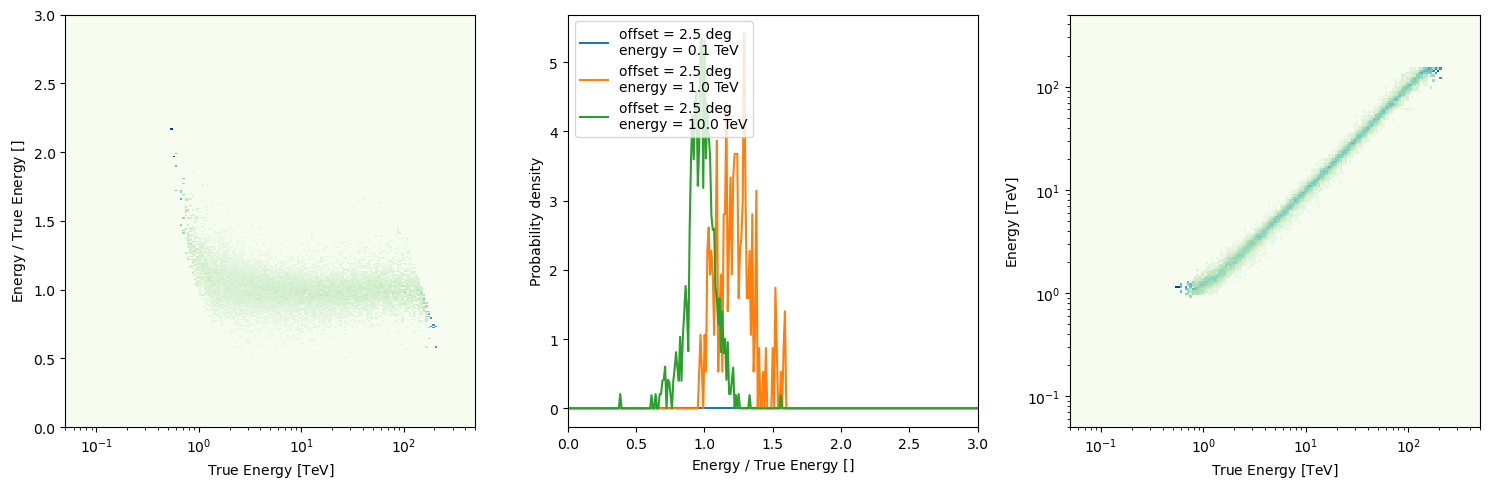

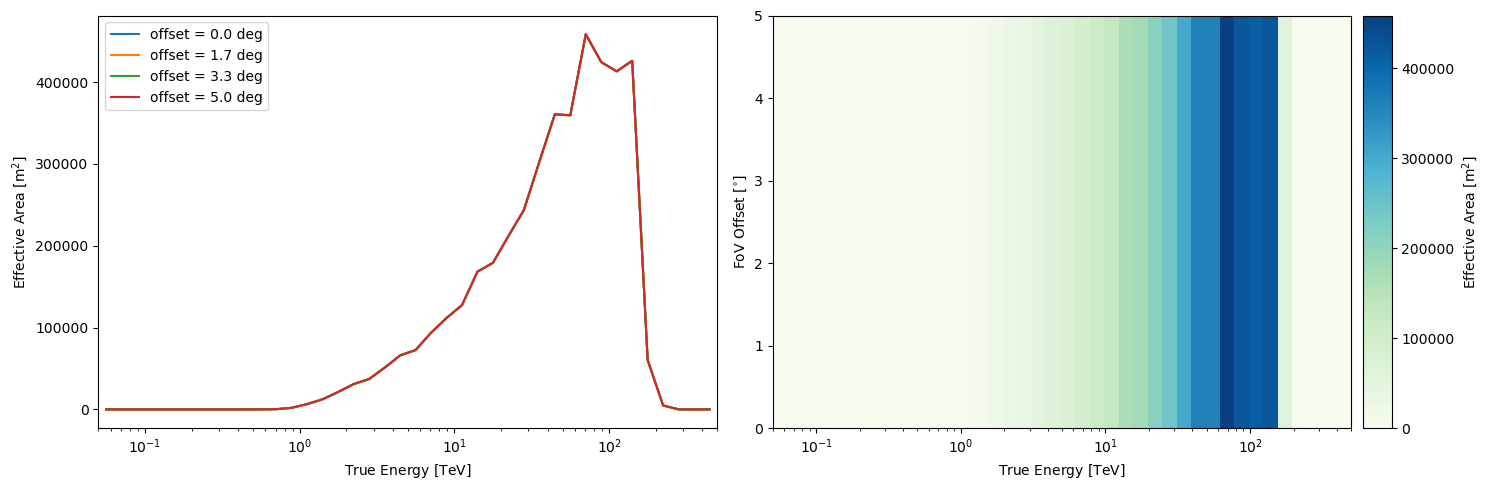

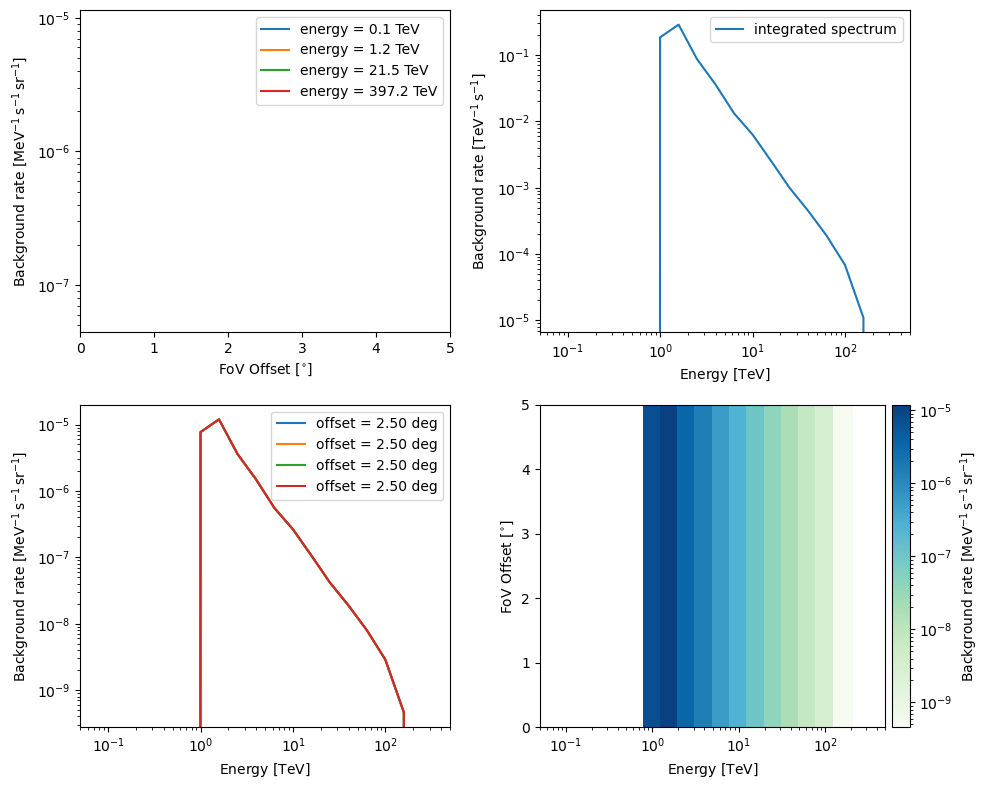

In [25]:
irf_filename = "/home/blacave/CTLearn/Software/CTLearn-Manager/notebooks/public_mc_point-like.fits"

rad_max = RadMax2D.read(irf_filename, hdu="RAD_MAX")
aeff = EffectiveAreaTable2D.read(irf_filename, hdu="EFFECTIVE AREA")
bkg = Background2D.read(irf_filename, hdu="BACKGROUND")
edisp = EnergyDispersion2D.read(irf_filename, hdu="ENERGY DISPERSION")
edisp.peek()
aeff.peek()
bkg.peek()
rad_max

In [11]:
hudl = fits.open(irf_filename)
hudl.info()

Filename: /home/blacave/CTLearn/Software/CTLearn-Manager/notebooks/public_mc_point-like.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EFFECTIVE AREA    1 BinTableHDU     39   1R x 5C   [40D, 40D, D, D, 40D]   
  2  ENERGY DISPERSION    1 BinTableHDU     45   1R x 7C   [172D, 172D, 301D, 301D, D, D, 51772D]   
  3  RAD_MAX       1 BinTableHDU     39   1R x 5C   [20D, 20D, D, D, 20D]   
  4  BACKGROUND    1 BinTableHDU     39   1R x 5C   [20D, 20D, D, D, 20D]   
  5  EFFECTIVE AREA PROTONS    1 BinTableHDU     39   1R x 5C   [40D, 40D, D, D, 40D]   
